# Test DRMS on Ames

In [1]:
import sys

import sunpy
from sunpy.map import Map
import drms
import matplotlib.pyplot as plt

sys.path.append('../scripts/')
from drms_on_ames import Client,SubprocessClient,ames_server

%matplotlib inline

This notebook shows an example of how to use a modified drms `Client` object to get the paths to data on the Pleiades cluster using a netdrms that is running locally rather than the one at JSOC.

In [3]:
c = Client()

List all of the series available on the Ames netDRMS.

In [4]:
c.series()

['aia.lev1',
 'aia.lev1_euv_12s',
 'aia_test.lev1_12s4arc',
 'cgem.lorentz',
 'cgem.pdfi_input',
 'cgem.pdfi_output',
 'hmi.m_45s',
 'hmi.m_720s',
 'hmi.v_45s',
 'hmi.v_avg120']

Get information about a particular series.

In [4]:
hmi_info = c.info('hmi.m_45s')

../scripts/drms_on_ames.py:49: UserWarning: Failed to open file for locking /home/jsoc/exports/Web_request_handles.lck.

  warnings.warn(r.stderr.decode('utf-8'))


In [5]:
hmi_info.segments

type  units protocol       dims         note
name                                                    
magnetogram  int  Gauss     fits  4096x4096  magnetogram

In [6]:
hmi_info.keywords

type  recscope                    defval  \
name                                                               
cparms_sg000          string  variable             compress Rice   
magnetogram_bzero     double  variable                         0   
magnetogram_bscale    double  variable                       0.1   
DATE                    time  variable     -4712.01.01_11:59:28Z   
DATE__OBS               time  variable  -4712.01.01_11:59:27.82Z   
TELESCOP              string  constant                   SDO/HMI   
INSTRUME              string  variable                             
WAVELNTH               float  constant                    6173.0   
CAMERA                   int  variable               -2147483648   
BUNIT                 string  constant                     Gauss   
ORIGIN                string  constant              SDO/JSOC-SDP   
CONTENT               string  constant               MAGNETOGRAM   
QUALITY                  int  variable                0x80000000   
QUALLEV1                 int  variable                0x80000000   
HISTORY               string  variable                             
COMMENT               string  variable                             
BLD_VERS              string  variable                             
HCAMID                   int  variable               -2147483648   
SOURCE                string  variable                             
TOTVALS                  int  variable               -2147483648   
DATAVALS                 int  variable               -2147483648   
MISSVALS                 int  variable               -2147483648   
SATVALS                  int  variable               -2147483648   
DATAMIN2               float  variable                       nan   
DATAMAX2               float  variable                       nan   
DATAMED2               float  variable                       nan   
DATAMEA2               float  variable                       nan   
DATARMS2               float  variable                       nan   
DATASKE2               float  variable                       nan   
DATAKUR2               float  variable                       nan   
...                      ...       ...                       ...   
OBS_VW                double  variable                       nan   
OBS_VN                double  variable                       nan   
RSUN_OBS              double  variable                       nan   
T_OBS                   time  variable  -4712.01.01_11:59:28_TAI   
T_REC                   time     ts_eq  -4712.01.01_11:59:28_TAI   
T_REC_epoch             time  constant   1993.01.01_00:00:00_TAI   
T_REC_step             float  constant                      45.0   
T_REC_unit            string  constant                      secs   
CADENCE                float  constant                      45.0   
DATASIGN                 int  constant                         1   
HFLID                    int  variable               -2147483648   
HCFTID                   int  variable               -2147483648   
QLOOK                    int  constant                         0   
CAL_FSN                  int  variable               -2147483648   
LUTQUERY              string  variable                             
TSEL                   float  variable                       nan   
TFRONT                 float  variable                       nan   
TINTNUM                  int  variable               -2147483648   
SINTNUM                  int  variable               -2147483648   
DISTCOEF              string  variable                             
ROTCOEF               string  variable                             
ODICOEFF                 int  variable               -2147483648   
OROCOEFF                 int  variable               -2147483648   
POLCALM                  int  variable               -2147483648   
CODEVER0              string  variable                             
CODEVER1              string  variable                             
CODEVER2    

And most importantly query for particular paths to files.

In [7]:
q = c.query('cgem.pdfi_output[12673][2017.09.06_00:00:00_TAI/1h]', seg=['Elonpdfi'])

../scripts/drms_on_ames.py:49: UserWarning: Unable to open lock file for writing: /home/jsoc/exports/tmp/lock.txt.
Failed to open file for locking /home/jsoc/exports/Web_request_handles.lck.

  warnings.warn(r.stderr.decode('utf-8'))


In [8]:
q

Elonpdfi
0  /nobackupp10/drms/SUM2/D1161060152/S00007/Elon...
1  /nobackupp10/drms/SUM2/D1161060152/S00008/Elon...
2  /nobackupp10/drms/SUM2/D1161060152/S00009/Elon...
3  /nobackupp10/drms/SUM3/D1161060153/S00000/Elon...
4  /nobackupp10/drms/SUM3/D1161060153/S00001/Elon...

This then returns the paths to the local files at Ames rather than those at JSOC.

Does this work for AIA?

In [9]:
aia_info = c.info('aia_test.lev1_12s4arc')

In [10]:
aia_info.segments

type     units protocol       dims                  note
name                                                                 
image_lev1  short        dn     fits  4096x4096  lev1 image fits file
spikes        int  location     fits    VARxVAR     spiked pixel list

In [11]:
aia_info.keywords

type  recscope  \
name                                    
cparms_sg000         string  variable   
image_lev1_bzero     double  variable   
image_lev1_bscale    double  variable   
cparms_sg001         string  variable   
spikes_bzero         double  variable   
spikes_bscale        double  variable   
BLD_VERS             string  variable   
LVL_NUM               float  constant   
T_REC                  time   ts_slot   
T_REC_step           double  constant   
T_REC_epoch            time  constant   
T_REC_round             int  constant   
ORIGIN               string  constant   
DATE                   time  variable   
TELESCOP             string  constant   
INSTRUME             string  variable   
DATE__OBS              time  variable   
T_OBS                  time  variable   
CAMERA                  int  variable   
IMG_TYPE             string  variable   
EXPTIME              double  variable   
EXPSDEV               float  variable   
INT_TIME              float  variable   
WAVELNTH                int  variable   
WAVEUNIT             string  constant   
WAVE_STR             string  variable   
FSN                     int  variable   
FID                     int  variable   
QUALLEV0                int  variable   
QUALITY                 int  variable   
...                     ...       ...   
AIMSHCTE              float  variable   
AICFGDL1              short  variable   
AICFGDL2              short  variable   
AICFGDL3              short  variable   
AICFGDL4              short  variable   
AIFOENFL              short  variable   
AIMGFSN                 int  variable   
AIMGTYP                 int  variable   
AIAWVLEN                int  variable   
AIAGP1                  int  variable   
AIAGP2                  int  variable   
AIAGP3                  int  variable   
AIAGP4                  int  variable   
AIAGP5                  int  variable   
AIAGP6                  int  variable   
AIAGP7                  int  variable   
AIAGP8                  int  variable   
AIAGP9                  int  variable   
AIAGP10                 int  variable   
AGT1SVY               short  variable   
AGT1SVZ               short  variable   
AGT2SVY               short  variable   
AGT2SVZ               short  variable   
AGT3SVY               short  variable   
AGT3SVZ               short  variable   
AGT4SVY               short  variable   
AGT4SVZ               short  variable   
AIMGSHEN              short  variable   
KEYWDDOC             string  constant   
T_REC_index        longlong     index   

                                                             defval     units  \
name                                                                            
cparms_sg000                                          compress Rice      none   
image_lev1_bzero                                                  0      none   
image_lev1_bscale                                               0.5      none   
cparms_sg001                                          compress Rice      none   
spikes_bzero                                                      0      none   
spikes_bscale                                                     1      none   
BLD_VERS                                                                 none   
LVL_NUM                                                    1.000000      none   
T_REC                                         -4712.01.01_11:59:28Z       ISO   
T_REC_step                                                12.000000    second   
T_REC_epoch                                 1977.01.01_00:00:00_TAI       TAI   
T_REC_round                                                       1      none   
ORIGIN                                                 SDO/JSOC-SDP      none   
DATE                                          -4712.01.01_11:59:28Z       ISO   
TELESCOP                                                    SDO/AIA      none   
INSTRUME                                                      

In [24]:
q = c.query('aia_test.lev1_12s4arc[2010-09-29T17:00:00/1h@12s][94]', seg=['image_lev1'])

In [27]:
q.values

array([['/nobackupp10/drms/SUM2/D1167894142/S00002/image_lev1.fits'],
       ['/nobackupp10/drms/SUM2/D1167894142/S00009/image_lev1.fits'],
       ['/nobackupp10/drms/SUM5/D1167894146/S00000/image_lev1.fits'],
       ['/nobackupp10/drms/SUM5/D1167894146/S00007/image_lev1.fits'],
       ['/nobackupp10/drms/SUM5/D1167894146/S00014/image_lev1.fits'],
       ['/nobackupp10/drms/SUM4/D1167894149/S00005/image_lev1.fits'],
       ['/nobackupp10/drms/SUM4/D1167894149/S00012/image_lev1.fits'],
       ['/nobackupp10/drms/SUM1/D1167894150/S00003/image_lev1.fits'],
       ['/nobackupp10/drms/SUM1/D1167894150/S00010/image_lev1.fits'],
       ['/nobackupp10/drms/SUM1/D1167894151/S00001/image_lev1.fits'],
       ['/nobackupp10/drms/SUM1/D1167894151/S00008/image_lev1.fits'],
       ['/nobackupp10/drms/SUM1/D1167894151/S00015/image_lev1.fits'],
       ['/nobackupp10/drms/SUM4/D1167894152/S00006/image_lev1.fits'],
       ['/nobackupp10/drms/SUM4/D1167894152/S00013/image_lev1.fits'],
       ['/nobackupp1

In [38]:
c.query('aia_test.lev1_12s4arc[2011-02-12T9:00:00/2m@12s][94]', seg=['image_lev1'])

image_lev1
0  /nobackupp10/drms/SUM4/D1167870884/S00002/imag...
1  /nobackupp10/drms/SUM4/D1167870884/S00009/imag...
2  /nobackupp10/drms/SUM1/D1167870885/S00000/imag...
3  /nobackupp10/drms/SUM1/D1167870885/S00007/imag...
4  /nobackupp10/drms/SUM1/D1167870885/S00014/imag...
5  /nobackupp10/drms/SUM5/D1167870886/S00005/imag...
6  /nobackupp10/drms/SUM5/D1167870886/S00012/imag...
7  /nobackupp10/drms/SUM1/D1167870887/S00003/imag...
8  /nobackupp10/drms/SUM1/D1167870887/S00010/imag...

## Read Some Maps into SunPy

Make a query for a minute of data

In [46]:
q = c.query('aia_test.lev1_12s4arc[2011-02-12T9:00:00/1m@12s][94]', seg=['image_lev1'])

../scripts/drms_on_ames.py:49: UserWarning: Unable to open lock file for writing: /home/jsoc/exports/tmp/lock.txt.
Failed to open file for locking /home/jsoc/exports/Web_request_handles.lck.

  warnings.warn(r.stderr.decode('utf-8'))


Read the list of paths into a list of SunPy maps

In [48]:
mc = Map(q.values.tolist())

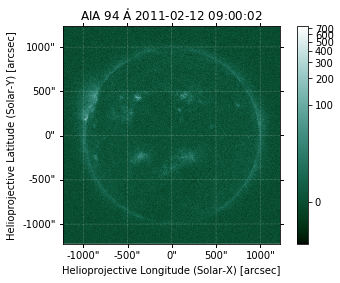

In [51]:
mc[0].peek()

## Bash Sandbox

In [27]:
%%bash
show_info -p cgem.pdfi_output[12673][2017.09.06_00:00:00_TAI/1h]

SUDIR
/nobackupp10/drms/SUM2/D1161060152/S00007
/nobackupp10/drms/SUM2/D1161060152/S00008
/nobackupp10/drms/SUM2/D1161060152/S00009
/nobackupp10/drms/SUM3/D1161060153/S00000
/nobackupp10/drms/SUM3/D1161060153/S00001


In [28]:
%%bash
show_series

  aia.lev1
  aia.lev1_euv_12s
  aia_test.lev1_12s4arc
  cgem.lorentz
  cgem.pdfi_input
  cgem.pdfi_output
  hmi.m_45s
  hmi.m_720s
  hmi.v_45s
  hmi.v_avg120


In [6]:
%%bash 
show_info -p op=rs_list ds=aia_test.lev1_12s4arc[2011-02-12T9:00:00/11m@12s][94] seg=image_lev1

image_lev1
/nobackupp10/drms/SUM4/D1167870884/S00002/image_lev1.fits
/nobackupp10/drms/SUM4/D1167870884/S00009/image_lev1.fits
/nobackupp10/drms/SUM1/D1167870885/S00000/image_lev1.fits
/nobackupp10/drms/SUM1/D1167870885/S00007/image_lev1.fits
/nobackupp10/drms/SUM1/D1167870885/S00014/image_lev1.fits
/nobackupp10/drms/SUM5/D1167870886/S00005/image_lev1.fits
/nobackupp10/drms/SUM5/D1167870886/S00012/image_lev1.fits
/nobackupp10/drms/SUM1/D1167870887/S00003/image_lev1.fits
/nobackupp10/drms/SUM1/D1167870887/S00010/image_lev1.fits
/nobackupp10/drms/SUM6/D1167870888/S00001/image_lev1.fits
/nobackupp10/drms/SUM6/D1167870888/S00008/image_lev1.fits
/nobackupp10/drms/SUM6/D1167870888/S00015/image_lev1.fits
/nobackupp10/drms/SUM6/D1167870889/S00006/image_lev1.fits
/nobackupp10/drms/SUM6/D1167870889/S00013/image_lev1.fits
/nobackupp10/drms/SUM4/D1167870890/S00004/image_lev1.fits
/nobackupp10/drms/SUM4/D1167870890/S00011/image_lev1.fits
/nobackupp10/drms/SUM3/D1167870891/S00002/image_lev1.fits
/no

In [34]:
ames_server.url_jsoc_info

'/usr/local/netdrms/9.2/bin/linux_x86_64/jsoc_info'

In [36]:
%%bash
jsoc_info op=rs_list ds=aia_test.lev1_12s4arc[2011-02-12T9:00:00/2m@12s][94] seg=image_lev1

Content-type: application/json

{"keywords":[],"segments":[{"name":"image_lev1","values":["\/nobackupp10\/drms\/SUM4\/D1167870884\/S00002\/image_lev1.fits","\/nobackupp10\/drms\/SUM4\/D1167870884\/S00009\/image_lev1.fits","\/nobackupp10\/drms\/SUM1\/D1167870885\/S00000\/image_lev1.fits","\/nobackupp10\/drms\/SUM1\/D1167870885\/S00007\/image_lev1.fits","\/nobackupp10\/drms\/SUM1\/D1167870885\/S00014\/image_lev1.fits","\/nobackupp10\/drms\/SUM5\/D1167870886\/S00005\/image_lev1.fits","\/nobackupp10\/drms\/SUM5\/D1167870886\/S00012\/image_lev1.fits","\/nobackupp10\/drms\/SUM1\/D1167870887\/S00003\/image_lev1.fits","\/nobackupp10\/drms\/SUM1\/D1167870887\/S00010\/image_lev1.fits"],"dims":["4096x4096","4096x4096","4096x4096","4096x4096","4096x4096","4096x4096","4096x4096","4096x4096","4096x4096"],"cparms":["compress Rice","compress Rice","compress Rice","compress Rice","compress Rice","compress Rice","compress Rice","compress Rice","compress Rice"],"bzeros":["0","0","0","0","0","0","0","0","

Unable to open lock file for writing: /home/jsoc/exports/tmp/lock.txt.
Failed to open file for locking /home/jsoc/exports/Web_request_handles.lck.


In [30]:
sp_client = SubprocessClient(ames_server)

In [33]:
sp_client.rs_list('aia_test.lev1_12s4arc[2011-02-12T9:00:00/3m@12s][94]',seg=['image_lev1'])

{'keywords': [],
 'segments': [{'name': 'image_lev1',
   'values': ['/nobackupp10/drms/SUM4/D1167870884/S00002/image_lev1.fits',
    '/nobackupp10/drms/SUM4/D1167870884/S00009/image_lev1.fits',
    '/nobackupp10/drms/SUM1/D1167870885/S00000/image_lev1.fits',
    '/nobackupp10/drms/SUM1/D1167870885/S00007/image_lev1.fits',
    '/nobackupp10/drms/SUM1/D1167870885/S00014/image_lev1.fits',
    '/nobackupp10/drms/SUM5/D1167870886/S00005/image_lev1.fits',
    '/nobackupp10/drms/SUM5/D1167870886/S00012/image_lev1.fits',
    '/nobackupp10/drms/SUM1/D1167870887/S00003/image_lev1.fits',
    '/nobackupp10/drms/SUM1/D1167870887/S00010/image_lev1.fits',
    'NoDataDirectory',
    'NoDataDirectory',
    'NoDataDirectory',
    'NoDataDirectory',
    'NoDataDirectory'],
   'dims': ['4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4096x4096',
    '4